In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the data
df=pd.read_csv('ToyotaCorolla.csv')
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [3]:
#Basic analysis
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [4]:
df.shape

(1436, 11)

In [5]:
df.size

15796

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [7]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [8]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [9]:
df.duplicated().sum()

1

In [10]:
df1=df.drop_duplicates(ignore_index=True)
df1

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1431,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1432,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1433,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [11]:
df1.corr()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.033928,0.124375,0.183604,NaN,0.063831,0.575869
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,0.031354,-0.096549,-0.146929,NaN,-0.005629,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,-0.082168,0.103822,-0.035193,NaN,0.014890,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.013313,0.035207,0.091803,NaN,0.209642,0.087143
Automatic,0.033928,0.031354,-0.082168,0.013313,1.000000,0.066934,-0.027492,NaN,-0.098582,0.058499
cc,0.124375,-0.096549,0.103822,0.035207,0.066934,1.000000,0.079254,NaN,0.014732,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,-0.027492,0.079254,1.000000,NaN,-0.160101,0.301734
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063831,-0.005629,0.014890,0.209642,-0.098582,0.014732,-0.160101,NaN,1.000000,0.021238
Weight,0.575869,-0.466484,-0.023969,0.087143,0.058499,0.335077,0.301734,NaN,0.021238,1.000000


<Axes: >

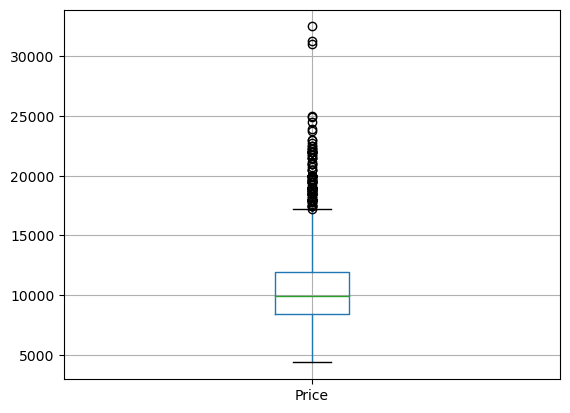

In [12]:
df1.boxplot('Price')

In [13]:
df1[['Price','Weight']].corr()

,Price,Weight
Price,1.000000,0.575869
Weight,0.575869,1.000000


In [14]:
sns.heatmap(df1[['Price','Weight']].corr())

<Axes: >

In [15]:
lab_encoder=LabelEncoder()

In [16]:
df1['Fuel_Type']=lab_encoder.fit_transform(df1['Fuel_Type'])

In [17]:
df1

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,2,86,0,1300,3,4,5,1025
1431,10845,72,19000,2,86,0,1300,3,4,5,1015
1432,8500,71,17016,2,86,0,1300,3,4,5,1015
1433,7250,70,16916,2,86,0,1300,3,4,5,1015


In [18]:
# preparing model

In [19]:
target=df1[['Price']]

In [20]:
features=df1.drop('Price',axis=1)

In [21]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=100)

In [22]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1148, 10)
(1148, 1)
(287, 10)
(287, 1)


In [23]:
linear_model=LinearRegression()

In [24]:
linear_model.fit(x_train,y_train)

LinearRegression()

In [25]:
y_pred=linear_model.predict(x_test)

In [26]:
y_pred

array([[15542.62555409],
       [10795.00465001],
       [13121.14886739],
       [10471.29701081],
       [ 8059.24993951],
       [ 9484.92082893],
       [13895.11035986],
       [ 6392.05054479],
       [13278.78914353],
       [ 8487.15330411],
       [13250.37560992],
       [ 7743.19431421],
       [11526.23520905],
       [ 5001.18363973],
       [18082.98097044],
       [ 8297.25467271],
       [13567.20064033],
       [15555.1406489 ],
       [16633.93885677],
       [ 9369.18652309],
       [12436.20906731],
       [10838.29480074],
       [10870.59653511],
       [11879.29740799],
       [ 8315.44486122],
       [ 8290.58158432],
       [ 9812.63806864],
       [ 8449.38280687],
       [ 9450.70618018],
       [ 8070.2821265 ],
       [ 9088.08901167],
       [12020.70509149],
       [ 6557.66900243],
       [19087.60517921],
       [ 9480.02273032],
       [ 9438.4901857 ],
       [ 7186.42954035],
       [ 8087.33601898],
       [14178.41596104],
       [10673.41201977],


In [27]:
linear_model.score(x_train,y_train)

0.8626130385692874

In [28]:
linear_model.score(x_test,y_test)

0.8671580177926699

In [29]:
linear_model.intercept_

array([-8689.50713129])

In [30]:
linear_model.coef_

array([[-1.24537995e+02, -1.76276977e-02,  3.95421517e+02,
         2.62373819e+01,  3.94335343e+02, -3.00403510e-02,
         4.30425267e+00,  1.13686838e-12,  7.33844905e+02,
         1.91383362e+01]])

In [31]:
from sklearn.metrics import r2_score

In [32]:
r2_score(y_test,y_pred)

0.8671580177926699

In [33]:
sns.regplot(data=df1,x=y_test,y=y_pred,scatter_kws={'color':'green'},line_kws={'color':'red'})

<Axes: xlabel='Price'>

In [34]:
# by using statsmodel

In [35]:
import statsmodels.formula.api as smf
model1=smf.ols('Price~Age_08_04+KM+Fuel_Type+HP+cc+Doors+Gears+Weight',data=df1).fit()

In [36]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1127.
Date:                Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                        11:39:03   Log-Likelihood:                -12362.
No. Observations:                1435   AIC:                         2.474e+04
Df Residuals:                    1426   BIC:                         2.479e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9852.8426   1478.988     -6.662      0.000   -1.28e+04   -6951.617
Age_08_04   -123.2082      2.608    -47.237      0.000    -128.325    -118.092
KM            -0.0177      0.001    -13.494      0.000      -0.020      -0.015
Fuel_Type    617.0386    145.592      4.238      0.000     331.441     902.637
HP            23.2994      2.872      8.114      0.000      17.666      28.932
cc            -0.0418      0.090     -0.465      0.642      -0.218       0.134
Doors        -35.7894     40.222     -0.890      0.374    -114.690      43.112
Gears        582.2973    196.381      2.965      0.003     197.070     967.525
Weight        20.9344      1.014     20.653      0.000      18.946      22.923
==============================================================================
Omnibus:                      270.225   Durbin-Watson:                   1.608
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2870.669
Skew:                          -0.545   Prob(JB):                         0.00
Kurtosis:                       9.843   Cond. No.                     3.29e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
model2=smf.ols('Price~cc',data=df1).fit()

In [38]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Mon, 15 Apr 2024   Prob (F-statistic):           2.29e-06
Time:                        11:39:06   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9053.5368    363.894     24.880      0.000    8339.715    9767.359
cc             1.0576      0.223      4.745      0.000       0.620       1.495
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
model3=smf.ols('Price~Doors',data=df1).fit()

In [40]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Mon, 15 Apr 2024   Prob (F-statistic):           2.40e-12
Time:                        11:39:08   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
Doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
model4=smf.ols('Price~Doors+cc',data=df1).fit()

In [42]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     34.40
Date:                Mon, 15 Apr 2024   Prob (F-statistic):           2.55e-15
Time:                        11:39:12   Log-Likelihood:                -13756.
No. Observations:                1435   AIC:                         2.752e+04
Df Residuals:                    1432   BIC:                         2.753e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6568.3395    513.700     12.786      0.000    5560.655    7576.024
Doors        662.3187     98.089      6.752      0.000     469.906     854.732
cc             0.9398      0.220      4.268      0.000       0.508       1.372
==============================================================================
Omnibus:                      448.494   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1297.612
Skew:                           1.602   Prob(JB):                    1.69e-282
Kurtosis:                       6.382   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
model4.resid.mean()

3.8940316708661126e-11

In [44]:
model4.resid_pearson

array([ 0.86893322,  0.93980501,  0.99650243, ..., -0.36201304,
       -0.71637196, -1.25685978])

In [45]:
model4.resid.plot(kind='hist')

<Axes: xlabel='Price', ylabel='Frequency'>

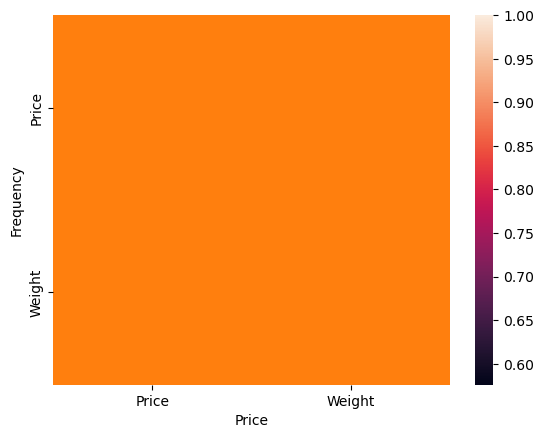

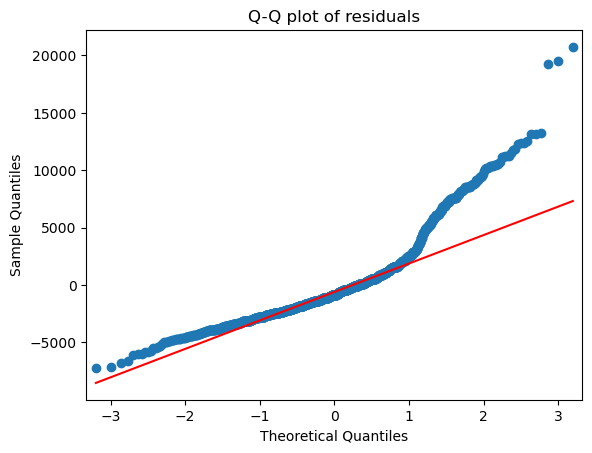

In [46]:
import statsmodels.api as sm
qqplot=sm.qqplot(model4.resid,line='q')
plt.title("Q-Q plot of residuals")
plt.show()

In [47]:
#Applying Lasso,Ridge method

In [48]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score

In [49]:
lasso=Lasso(alpha=2)

In [50]:
lasso.fit(x_train,y_train)

Lasso(alpha=2)

In [51]:
y_pred=lasso.predict(x_test)

In [52]:
y_pred

array([15535.33357727, 10798.60278209, 13128.65182423, 10472.98259672,
        8061.21665822,  9451.62149365, 13895.88023501,  6388.12445434,
       13277.77884749,  8485.9943513 , 13260.72638017,  7699.81763217,
       11528.34608186,  4984.8824338 , 18084.63657131,  8308.82969744,
       13565.8663738 , 15560.49497551, 16637.24873992,  9382.75511014,
       12445.05192929, 10780.37675906, 10879.21582621, 11884.32081269,
        8321.49461064,  8283.93939524,  9824.64107373,  8456.4439936 ,
        9460.65953027,  8081.38716205,  9085.4409467 , 12026.70510086,
        6561.78365607, 19086.03847221,  9490.95748096,  9448.37435544,
        7192.85479828,  8083.06723788, 14177.52871051, 10680.01531916,
        7682.66711741,  8011.8436919 ,  9803.82916223, 13882.9614978 ,
        8496.56171973,  9230.52462183, 12564.84546836,  6898.98616673,
       11006.06842547, 12815.66095063, 10054.19640552, 12895.05843796,
       12703.81638076, 14530.43377176, 19509.83638842, 11058.15551644,
      

In [53]:
r2_score(y_test,y_pred)

0.8672128573315887

In [54]:
lasso.intercept_

array([-8286.44378335])

In [55]:
lasso.coef_

array([-1.24427888e+02, -1.77275250e-02,  3.71285103e+02,  2.66341196e+01,
        3.51346244e+02, -2.99874423e-02,  0.00000000e+00,  0.00000000e+00,
        6.66925493e+02,  1.90995146e+01])

In [56]:
params={'alpha':[1,2,3,4,5,6]}

In [57]:
grid_search=GridSearchCV(lasso,params)

In [58]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=Lasso(alpha=2), param_grid={'alpha': [1, 2, 3, 4, 5, 6]})

In [59]:
grid_search.best_params_

{'alpha': 6}

In [60]:
lasso1=Lasso(alpha=6)

In [61]:
lasso1.fit(x_train,y_train)

Lasso(alpha=6)

In [62]:
y_pred1=lasso1.predict(x_test)

In [63]:
y_pred1

array([15526.24858617, 10813.39447402, 13137.41411112, 10483.8982614 ,
        8072.33117303,  9386.19857596, 13904.73978644,  6386.68226839,
       13282.48758289,  8489.83956192, 13272.73795677,  7617.33258868,
       11539.69551447,  4960.90233284, 18095.64508333,  8323.4773102 ,
       13572.2550817 , 15560.67421343, 16633.07425123,  9401.76798123,
       12454.30559568, 10663.65363334, 10890.26160787, 11903.35620476,
        8323.94032091,  8281.00193877,  9840.29837353,  8477.91752653,
        9471.87052615,  8095.00710298,  9086.10459869, 12039.90687935,
        6564.47605595, 19087.15305755,  9504.2892958 ,  9459.43527881,
        7206.42989411,  8081.52487611, 14182.82597822, 10694.17169176,
        7698.31756192,  8026.36481495,  9823.03863613, 13893.10895149,
        8494.47089524,  9234.71128535, 12576.60155855,  6889.63472406,
       11011.7495    , 12827.79283771, 10074.40860065, 12895.00343755,
       12703.26444694, 14543.5434501 , 19535.65455432, 11066.02025183,
      

In [64]:
r2_score(y_test,y_pred)

0.8672128573315887

In [65]:
# Applying Ridge mrthod

In [66]:
ridge=Ridge()

In [67]:
params={'alpha':[1,2,3,4,5]}

In [68]:
grid_search=GridSearchCV(ridge,params)

In [69]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=Ridge(), param_grid={'alpha': [1, 2, 3, 4, 5]})

In [70]:
grid_search.best_params_

{'alpha': 5}

In [71]:
ridge=Ridge(alpha=5)

In [72]:
ridge.fit(x_train,y_train)

Ridge(alpha=5)

In [73]:
y_pred=ridge.predict(x_test)

In [74]:
y_pred

array([[15537.36894727],
       [10799.65439913],
       [13126.77157123],
       [10474.81670742],
       [ 8063.09380891],
       [ 9457.74254083],
       [13897.74650441],
       [ 6388.89177058],
       [13280.31834694],
       [ 8488.92477436],
       [13259.95072944],
       [ 7705.73368854],
       [11529.85539183],
       [ 4989.68165119],
       [18085.84219858],
       [ 8308.02664543],
       [13566.24127883],
       [15558.60694186],
       [16636.04094327],
       [ 9381.12179657],
       [12444.98727408],
       [10758.06665715],
       [10877.09474767],
       [11880.83135846],
       [ 8322.71634433],
       [ 8284.86559612],
       [ 9823.55874852],
       [ 8456.43120959],
       [ 9460.37264508],
       [ 8080.77782376],
       [ 9088.88136331],
       [12027.49743552],
       [ 6559.71343184],
       [19087.91591327],
       [ 9490.30104716],
       [ 9448.1143181 ],
       [ 7193.82665065],
       [ 8083.91225755],
       [14179.99281306],
       [10680.64644313],


In [75]:
r2_score(y_test,y_pred)

0.8672494084856516

In [76]:
ridge.coef_

array([[-1.24459301e+02, -1.76887835e-02,  3.75990013e+02,
         2.66707636e+01,  3.58197632e+02, -3.00276827e-02,
         1.24675635e+00,  0.00000000e+00,  6.44721526e+02,
         1.91042643e+01]])

In [77]:
ridge.intercept_

array([-8198.6517118])